# 공공데이터를 활용한 미세먼지 농도 예측 (1)

### 목표
* 공공 데이터를 기반으로 머신러닝을 통해 미세먼지의 농도 예측

### 데이터
* 1 air_2021.csv : 2021년 미세먼지 데이터  
* 2 air_2022.csv : 2022년 미세먼지 데이터  
* 3 weather_2021.csv : 2021년 날씨 데이터  
* 4 weather_2022.csv : 2022년 날씨 데이터    
<br>
* Train 데이터 : 2021년의 미세먼지 농도 데이터
* Test 데이터 : 2022년의 미세먼지 농도 데이터
---

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## 1> 데이터 확인

In [2]:
air_21 = pd.read_csv('data/air_2021.csv', sep=',', encoding='utf-8', index_col=0)
air_22 = pd.read_csv('data/air_2022.csv', sep=',', encoding='utf-8', index_col=0)
display(air_21.head(2))
display(air_22.head(2))

,지역,망,측정소코드,측정소명,측정일시,SO2,CO,O3,NO2,PM10,PM25,주소
0,서울 종로구,도시대기,111123,종로구,2021100101,0.003,0.6,0.002,0.039,31.0,18.0,서울 종로구 종로35가길 19
1,서울 종로구,도시대기,111123,종로구,2021100102,0.003,0.6,0.002,0.035,27.0,16.0,서울 종로구 종로35가길 19


,지역,망,측정소코드,측정소명,측정일시,SO2,CO,O3,NO2,PM10,PM25,주소
0,서울 종로구,도시대기,111123,종로구,2022010101,0.003,0.4,0.026,0.016,23.0,12.0,서울 종로구 종로35가길 19
1,서울 종로구,도시대기,111123,종로구,2022010102,0.003,0.4,0.022,0.020,20.0,9.0,서울 종로구 종로35가길 19


In [3]:
air_21.shape, air_22.shape

((8760, 12), (2160, 12))

In [4]:
weather_21 = pd.read_csv('data/weather_2021.csv', sep=',', encoding='cp949')
weather_22 = pd.read_csv('data/weather_2022.csv', sep=',', encoding='cp949')
display(weather_21.head(2))
display(weather_22.head(2))

,지점,지점명,일시,기온(°C),기온 QC플래그,강수량(mm),강수량 QC플래그,풍속(m/s),풍속 QC플래그,풍향(16방위),...,최저운고(100m ),시정(10m),지면상태(지면상태코드),현상번호(국내식),지면온도(°C),지면온도 QC플래그,5cm 지중온도(°C),10cm 지중온도(°C),20cm 지중온도(°C),30cm 지중온도(°C)
0,108,서울,2021-01-01 01:00,-8.7,NaN,NaN,NaN,2.4,NaN,270.0,...,NaN,2000,NaN,NaN,-6.9,NaN,-1.0,-0.8,0.3,1.6
1,108,서울,2021-01-01 02:00,-9.1,NaN,NaN,NaN,1.6,NaN,270.0,...,NaN,2000,NaN,NaN,-7.1,NaN,-1.1,-0.8,0.3,1.6


,지점,지점명,일시,기온(°C),기온 QC플래그,강수량(mm),강수량 QC플래그,풍속(m/s),풍속 QC플래그,풍향(16방위),...,최저운고(100m ),시정(10m),지면상태(지면상태코드),현상번호(국내식),지면온도(°C),지면온도 QC플래그,5cm 지중온도(°C),10cm 지중온도(°C),20cm 지중온도(°C),30cm 지중온도(°C)
0,108,서울,2022-01-01 00:00,-8.5,NaN,NaN,NaN,1.9,NaN,320,...,NaN,2000,NaN,NaN,-7.0,NaN,-1.0,-1.0,-0.2,1.0
1,108,서울,2022-01-01 01:00,-9.2,NaN,NaN,NaN,1.8,NaN,270,...,NaN,2000,NaN,NaN,-7.2,NaN,-1.1,-1.1,-0.2,1.0


In [5]:
weather_21.shape, weather_22.shape

((8759, 38), (2160, 38))

---

## 2> 데이터 전처리

### 2-1> 미세먼지 데이터 전처리
* 불필요한 변수 제거
* 1~24시 표기를 0~23시 표기로 변환
* 시계열 데이터이므로 interpolate로 보간
* 측정일시 데이터 datetime 형태로 변환

In [6]:
air_21.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8760 entries, 0 to 8759
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   지역      8760 non-null   object 
 1   망       8760 non-null   object 
 2   측정소코드   8760 non-null   int64  
 3   측정소명    8760 non-null   object 
 4   측정일시    8760 non-null   int64  
 5   SO2     8648 non-null   float64
 6   CO      8680 non-null   float64
 7   O3      8663 non-null   float64
 8   NO2     8680 non-null   float64
 9   PM10    8655 non-null   float64
 10  PM25    8663 non-null   float64
 11  주소      8760 non-null   object 
dtypes: float64(6), int64(2), object(4)
memory usage: 889.7+ KB


In [7]:
drop_cols_air = ['지역', '망', '측정소코드', '측정소명', '주소']

In [8]:
air_21['측정일시'][:25]

0     2021100101
1     2021100102
2     2021100103
3     2021100104
4     2021100105
5     2021100106
6     2021100107
7     2021100108
8     2021100109
9     2021100110
10    2021100111
11    2021100112
12    2021100113
13    2021100114
14    2021100115
15    2021100116
16    2021100117
17    2021100118
18    2021100119
19    2021100120
20    2021100121
21    2021100122
22    2021100123
23    2021100124
24    2021100201
Name: 측정일시, dtype: int64

In [9]:
Air_21 = air_21.drop(axis=1, columns=drop_cols_air)
Air_21['측정일시'] = Air_21['측정일시'] - 1
Air_21 = Air_21.interpolate()
Air_21['측정일시'] = pd.to_datetime(Air_21['측정일시'], format='%Y%m%d%H')
Air_21.sort_values(by='측정일시', inplace=True)

In [10]:
Air_21.tail(2)

,측정일시,SO2,CO,O3,NO2,PM10,PM25
2206,2021-12-31 22:00:00,0.003,0.4,0.029,0.015,20.0,9.0
2207,2021-12-31 23:00:00,0.003,0.4,0.026,0.016,20.0,9.0


In [11]:
air_22.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2160 entries, 0 to 2159
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   지역      2160 non-null   object 
 1   망       2160 non-null   object 
 2   측정소코드   2160 non-null   int64  
 3   측정소명    2160 non-null   object 
 4   측정일시    2160 non-null   int64  
 5   SO2     2139 non-null   float64
 6   CO      2139 non-null   float64
 7   O3      2139 non-null   float64
 8   NO2     2139 non-null   float64
 9   PM10    2122 non-null   float64
 10  PM25    2135 non-null   float64
 11  주소      2160 non-null   object 
dtypes: float64(6), int64(2), object(4)
memory usage: 219.4+ KB


In [12]:
Air_22 = air_22.drop(axis=1, columns=drop_cols_air)
Air_22['측정일시'] = Air_22['측정일시'] - 1
Air_22 = Air_22.interpolate()
Air_22['측정일시'] = pd.to_datetime(Air_22['측정일시'], format='%Y%m%d%H')
Air_22.sort_values(by='측정일시', inplace=True)

In [13]:
Air_22.tail(2)

,측정일시,SO2,CO,O3,NO2,PM10,PM25
2158,2022-03-31 22:00:00,0.003,0.3,0.036,0.015,11.0,5.0
2159,2022-03-31 23:00:00,0.002,0.4,0.033,0.017,9.0,5.0


### 2-2> 날씨 데이터 전처리
* 시계열 데이터이므로 interpolate로 보간
* 강수량(mm)의 경우, 데이터의 0번부터 결측값이 있어 interpolate로 보간이 안되므로 fillna 0으로 보간
* 일시 데이터 datetime 형태로 변환
* 단위를 포함한 컬럼이름 변경

In [14]:
weather_21.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8759 entries, 0 to 8758
Data columns (total 38 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   지점             8759 non-null   int64  
 1   지점명            8759 non-null   object 
 2   일시             8759 non-null   object 
 3   기온(°C)         8759 non-null   float64
 4   기온 QC플래그       0 non-null      float64
 5   강수량(mm)        949 non-null    float64
 6   강수량 QC플래그      1763 non-null   float64
 7   풍속(m/s)        8757 non-null   float64
 8   풍속 QC플래그       2 non-null      float64
 9   풍향(16방위)       8757 non-null   float64
 10  풍향 QC플래그       2 non-null      float64
 11  습도(%)          8759 non-null   int64  
 12  습도 QC플래그       0 non-null      float64
 13  증기압(hPa)       8759 non-null   float64
 14  이슬점온도(°C)      8759 non-null   float64
 15  현지기압(hPa)      8759 non-null   float64
 16  현지기압 QC플래그     0 non-null      float64
 17  해면기압(hPa)      8759 non-null   float64
 18  해면기압 QC플

In [16]:
drop_cols_wea = ['지점', '지점명',
                 '기온 QC플래그', '강수량 QC플래그', '풍속 QC플래그', '풍향(16방위)', '풍향 QC플래그',
                 '습도 QC플래그', '이슬점온도(°C)', '현지기압(hPa)', '현지기압 QC플래그', '해면기압(hPa)', '해면기압 QC플래그',
                 '일조 QC플래그', '일사 QC플래그', '3시간신적설(cm)', '전운량(10분위)', '운형(운형약어)',
                 '지면상태(지면상태코드)', '현상번호(국내식)', '지면온도 QC플래그',
                 '10cm 지중온도(°C)', '20cm 지중온도(°C)', '30cm 지중온도(°C)']

In [17]:
Wea_21 = weather_21.drop(axis=1, columns=drop_cols_wea).interpolate()
Wea_21.fillna(0, inplace=True)
Wea_21['일시'] = pd.to_datetime(Wea_21['일시'])
Wea_21.sort_values(by='일시', inplace=True)

In [18]:
Wea_21.rename(columns={'일시':'측정일시',
                       '기온(°C)':'기온',
                       '강수량(mm)':'강수량',
                       '풍속(m/s)':'풍속',
                       '습도(%)':'습도',
                       '증기압(hPa)':'증기압',
                       '일조(hr)':'일조시간',
                       '일사(MJ/m2)':'일사량',
                       '적설(cm)':'적설량',
                       '중하층운량(10분위)':'구름분포량',
                       '최저운고(100m )':'최저운고',
                       '시정(10m)':'시정',
                       '지면온도(°C)':'지면온도',
                       '5cm 지중온도(°C)':'5cm지중온도'}, inplace=True)

In [19]:
Wea_21.tail(2)

,측정일시,기온,강수량,풍속,습도,증기압,일조시간,일사량,적설량,구름분포량,최저운고,시정,지면온도,5cm지중온도
8757,2021-12-31 22:00:00,-7.5,0.0,3.0,37,1.3,0.0,0.02,0.1,0,10.0,2000,-6.2,-0.8
8758,2021-12-31 23:00:00,-7.7,0.0,2.9,38,1.3,0.0,0.02,0.1,0,10.0,2000,-6.5,-0.9


In [20]:
weather_22.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2160 entries, 0 to 2159
Data columns (total 38 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   지점             2160 non-null   int64  
 1   지점명            2160 non-null   object 
 2   일시             2160 non-null   object 
 3   기온(°C)         2160 non-null   float64
 4   기온 QC플래그       0 non-null      float64
 5   강수량(mm)        81 non-null     float64
 6   강수량 QC플래그      382 non-null    float64
 7   풍속(m/s)        2160 non-null   float64
 8   풍속 QC플래그       0 non-null      float64
 9   풍향(16방위)       2160 non-null   int64  
 10  풍향 QC플래그       0 non-null      float64
 11  습도(%)          2160 non-null   int64  
 12  습도 QC플래그       0 non-null      float64
 13  증기압(hPa)       2160 non-null   float64
 14  이슬점온도(°C)      2160 non-null   float64
 15  현지기압(hPa)      2160 non-null   float64
 16  현지기압 QC플래그     0 non-null      float64
 17  해면기압(hPa)      2160 non-null   float64
 18  해면기압 QC플

In [21]:
Wea_22 = weather_22.drop(axis=1, columns=drop_cols_wea).interpolate()
Wea_22.fillna(0, inplace=True)
Wea_22['일시'] = pd.to_datetime(Wea_22['일시'])
Wea_22.sort_values(by='일시', inplace=True)

In [22]:
Wea_22.rename(columns={'일시':'측정일시',
                       '기온(°C)':'기온',
                       '강수량(mm)':'강수량',
                       '풍속(m/s)':'풍속',
                       '습도(%)':'습도',
                       '증기압(hPa)':'증기압',
                       '일조(hr)':'일조시간',
                       '일사(MJ/m2)':'일사량',
                       '적설(cm)':'적설량',
                       '중하층운량(10분위)':'구름분포량',
                       '최저운고(100m )':'최저운고',
                       '시정(10m)':'시정',
                       '지면온도(°C)':'지면온도',
                       '5cm 지중온도(°C)':'5cm지중온도'}, inplace=True)

In [23]:
Wea_22.tail(2)

,측정일시,기온,강수량,풍속,습도,증기압,일조시간,일사량,적설량,구름분포량,최저운고,시정,지면온도,5cm지중온도
2158,2022-03-31 22:00:00,9.3,0.0,1.9,58,6.8,0.4,0.2,0.5,3,10.0,2000,7.3,11.4
2159,2022-03-31 23:00:00,8.4,0.0,1.2,61,6.7,0.4,0.2,0.5,1,10.0,2000,6.7,11.0


In [25]:
Air_21.to_csv("data/Air_21_prep.csv", index=False)
Air_22.to_csv("data/Air_22_prep.csv", index=False)
Wea_21.to_csv("data/Weather_21_prep.csv", index=False)
Wea_22.to_csv("data/Weather_22_prep.csv", index=False)

---

## 3> 데이터 시각화
* 데이터 시각화를 통해 관측치들의 패턴이나 변수들 간의 관계를 파악

In [26]:
plt.rc("font", family="Malgun Gothic")
sns.set_theme(font="Malgun Gothic", 
              rc={"axes.unicode_minus":False}, style='darkgrid') # 음수 부호 깨짐 방지, 그래프 배경색

### 3-1> 미세먼지 데이터 시각화

In [27]:
Air_21[['CO']].describe().T

,count,mean,std,min,25%,50%,75%,max
CO,8760.0,0.505097,0.208953,0.2,0.4,0.4,0.6,2.0


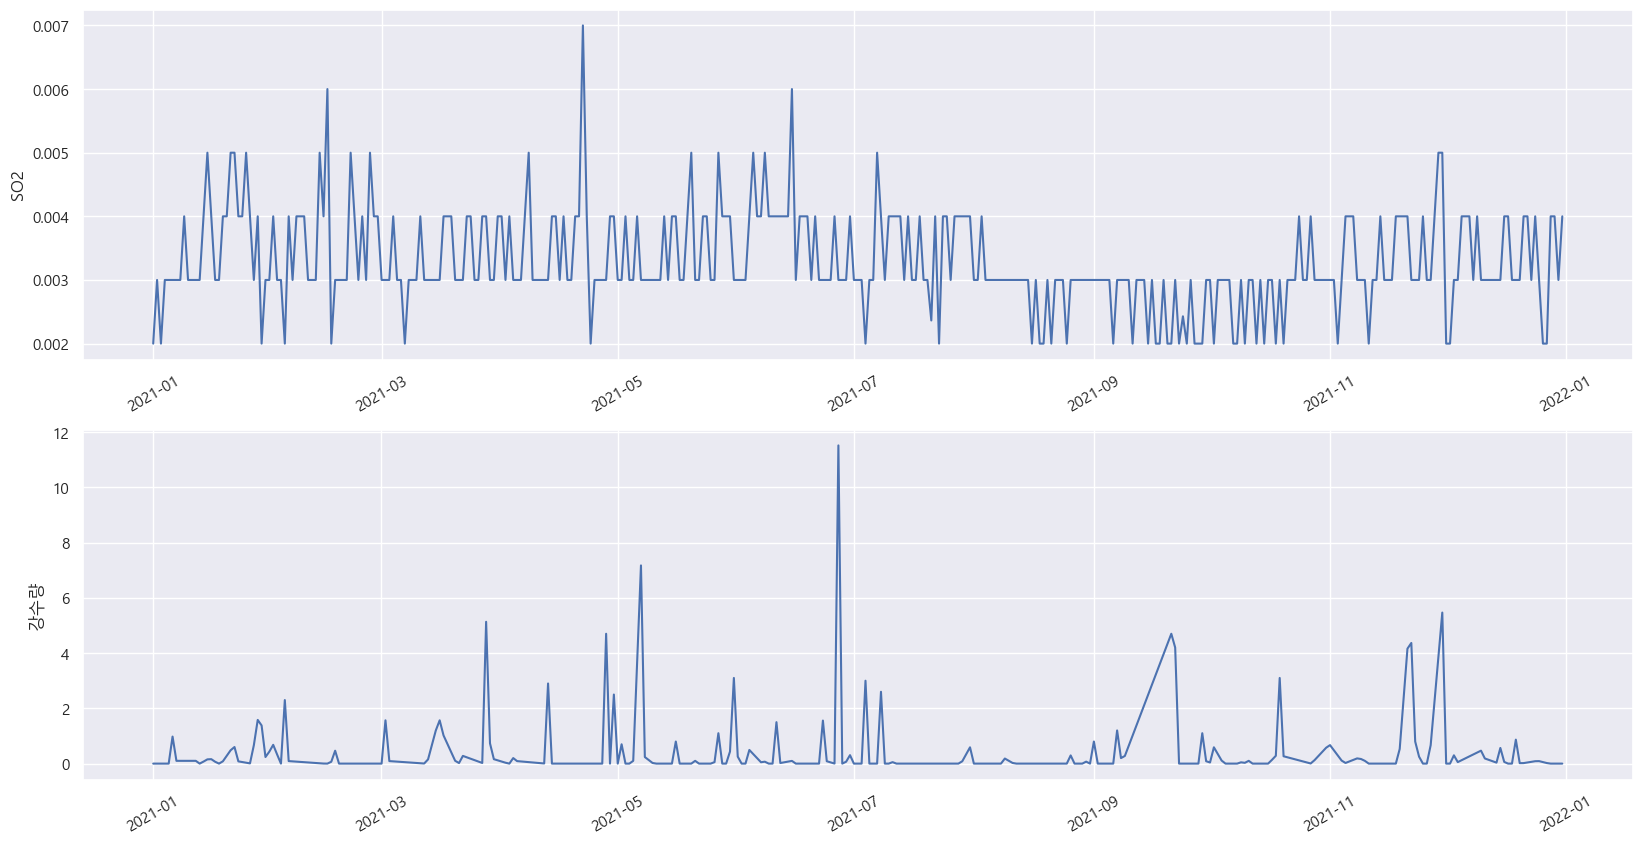

In [28]:
plt.figure(figsize=(20,10))

plt.subplot(2, 1, 1)
plt.plot('측정일시', 'SO2', data=Air_21[::24])
plt.xticks(rotation=30)
plt.ylabel('SO2')

plt.subplot(2, 1, 2)
plt.plot('측정일시', '강수량', data=Wea_21[::24])
plt.xticks(rotation=30)
plt.ylabel('강수량')

plt.show()

In [ ]:
# 아래에 필요한 코드를 작성하고 결과를 확인합니다.
plt.figure(figsize=(20,10))

plt.subplot(2, 1, 1)
plt.plot('측정일시', 'PM10', data=Air_21[::168])
plt.xticks(rotation=30)
plt.ylabel('PM10')

plt.subplot(2, 1, 2)
plt.plot('측정일시', '풍속', data=Wea_21[::168])
plt.xticks(rotation=30)
plt.ylabel('풍속')

plt.show()

### 3-2> 인사이트 1

In [ ]:
# 시각화를 통해 알게된 사실을 정리해봅니다.
# 1. 강수량이 높은 날 이후에는 SO2 농도가 낮아진다.
# 2. 풍속이 강한 다음 날에는 PM10 농도가 낮아진다.
# 3.

### 3-3> 날씨 데이터 시각화

In [ ]:
# weather_21,weather_22 의 다양한 변수에 대하여 시각화





In [ ]:
# 아래에 필요한 코드를 작성하고 결과를 확인합니다.





In [ ]:
# 아래에 필요한 코드를 작성하고 결과를 확인합니다.





### 3-4> 인사이트 2

In [ ]:
# 시각화를 통해 알게된 사실을 정리해봅니다.
# 1. 
# 2.
# 3.